In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
data = pd.read_csv('Data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [5]:
data[data['sex'] == "Female"]['age'].mean()

36.85823043357163

In [6]:
total_adults = data['native-country'].count()
total_Germans = data[data['native-country'] == 'Germany']['native-country'].count()
Germans_percentage = (total_Germans/total_adults) * 100

#print(data['native-country'].value_counts(normalize=True))
adults = data['native-country'].value_counts(normalize=True)
German_percentage = adults['Germany'] * 100
German_percentage



0.42074874850281013

In [7]:
mapping = {'Bachelors' : 10, 'Some-college' : 8, '11th' : 6, 'HS-grad' : 9, 'Prof-school' : 15, 'Assoc-acdm' : 11, 'Assoc-voc' : 12, '9th' : 4, '7th-8th' : 3, '12th' : 7, 'Masters' : 13, '1st-4th' : 1, '10th' : 5, 'Doctorate' : 14, '5th-6th' : 2, 'Preschool': 0}


In [8]:
data['education'] = data['education'].map(mapping)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,10,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,10,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,10,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


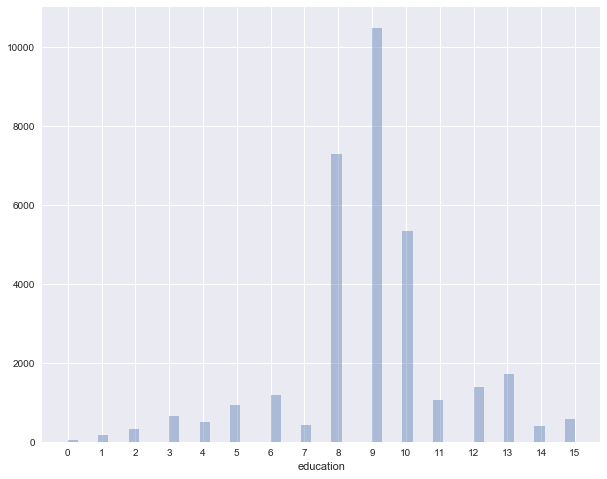

In [10]:
plt.xticks([i for i in range(0,16)]) # using our own x labels or indices
sns.distplot(data['education'], kde=False) # Setting kde to False will remove the distribution curve

In [11]:
data['education'].value_counts()

9     10501
8      7291
10     5355
13     1723
12     1382
6      1175
11     1067
5       933
3       646
15      576
4       514
7       433
14      413
2       333
1       168
0        51
Name: education, dtype: int64

In [13]:
data[data['salary'] == '<=50K']['age'].mean()
data[data['salary'] == '<=50K']['age'].std()
data[data['salary'] == '>50K']['age'].mean()
data[data['salary'] == '>50K']['age'].std()

10.51902771985177

In [14]:
data[data['salary'] == '>50K']['education'].min()


1

In [15]:
columns = ['race','sex']
data.groupby(['age'])[columns].describe()
data[data['race'] == 'Amer-Indian-Eskimo']['age'].max()

82

In [16]:
married = data[data['marital-status'].apply(lambda status: status[0] == 'M')][data['salary'] == '>50K'][data['sex']=='Male'].count()
married['marital-status']

C:\Users\kappaavr\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


5965

In [17]:
single = data[data['marital-status'].apply(lambda status: status[0] != 'M')][data['salary'] == '>50K'][data['sex']=='Male'].count()
single['marital-status']

C:\Users\kappaavr\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


697

In [18]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [20]:
MAX_hours = data['hours-per-week'].max()
MAX_hours_count = data[data['hours-per-week'] == MAX_hours]['hours-per-week'].count()
More_than_50K = data[data['hours-per-week'] == MAX_hours][data['salary'] == '>50K'].count()
percentage = np.divide(More_than_50K[0],MAX_hours_count) * 100
percentage


C:\Users\kappaavr\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


29.411764705882355

In [21]:
#data[data['salary'] == '<=50K']['native-country']['hours-per-week']
data[data['native-country'] == 'Japan'][data['salary'] == '>50K']['hours-per-week'].mean()
# For this question, it is conditioned on salary and country. 
# They come first and the value to be found, which is the mean, is added at the end

C:\Users\kappaavr\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


47.958333333333336